<a href="https://colab.research.google.com/github/aruninimz/hello-world/blob/main/Stock_Prediction_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import datetime
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
dataSet = pd.read_csv('/content/drive/MyDrive/ML Assignment2/Tesla.csv - Tesla.csv.csv')
dataSet

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [45]:
dataSet['Date'] = pd.to_datetime(dataSet.Date)

In [46]:
dataSet.size

11844

In [47]:
dataSet.shape

(1692, 7)

In [48]:
dataSet.drop('Adj Close' ,axis = 1 ,inplace = True) 

In [50]:
dataSet.head(20)

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,6921700
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,7711400
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,4050600
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,2202500
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,2680100


In [51]:
dataSet.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [52]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1692 non-null   datetime64[ns]
 1   Open    1692 non-null   float64       
 2   High    1692 non-null   float64       
 3   Low     1692 non-null   float64       
 4   Close   1692 non-null   float64       
 5   Volume  1692 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 79.4 KB


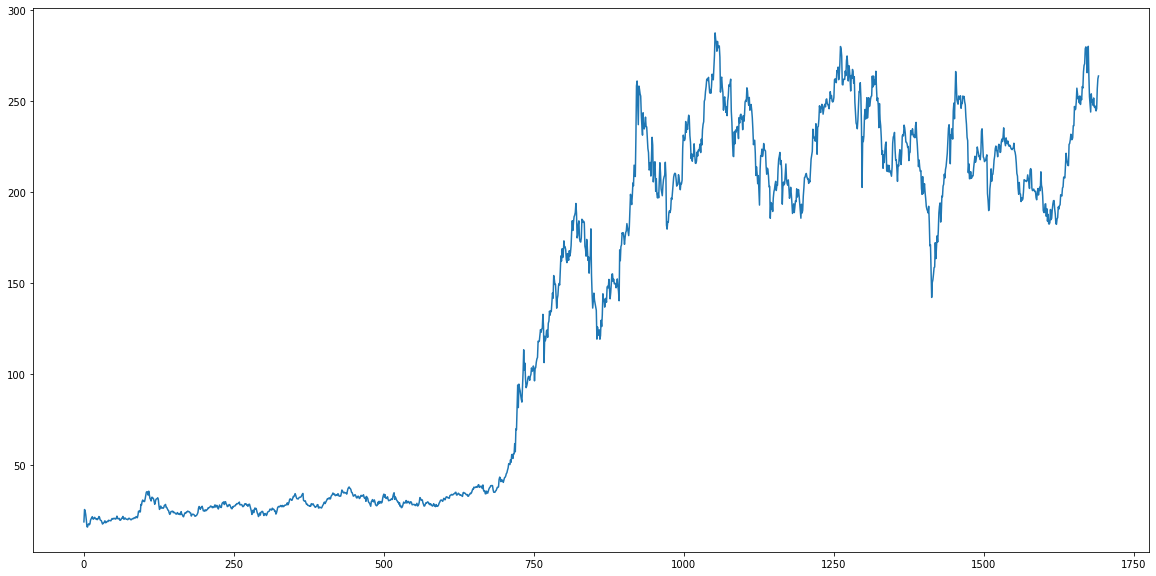

In [53]:
dataSet['Open'].plot(figsize=(20,10))

In [54]:
x = dataSet[['Open','High','Low','Volume']]
y = dataSet['Close']

In [55]:
X_train, X_test, Y_train, Y_test =  train_test_split(x ,y ,random_state=0)

In [56]:
len(X_train)

1269

In [57]:
len(X_test)

423

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
reg = LinearRegression()

In [59]:
reg.fit(X_train, Y_train)

LinearRegression()

In [60]:
predict_price = reg.predict(X_test)

In [61]:
print(X_test)

            Open        High         Low   Volume
124    31.260000   32.480000   29.920000  1552600
1688  246.110001  258.119995  246.020004  7575500
1397  198.970001  205.070007  197.250000  5322200
6      16.139999   17.520000   15.570000  7711400
1279  264.269989  267.890015  262.000000  2790100
...          ...         ...         ...      ...
1222  221.000000  237.479996  220.250000  9455900
215    27.200001   27.440001   26.170000  1218500
536    29.690001   31.299999   29.100000   870100
1630  198.080002  202.589996  197.600006  3796900
1548  224.169998  225.110001  222.679993  2065500

[423 rows x 4 columns]


In [62]:
dataFrame = pd.DataFrame(Y_test,predict_price)

In [63]:
dframe = pd.DataFrame({'Actual Price':Y_test, 'Predicted Price' : predict_price})

In [64]:
print(dframe) 

      Actual Price  Predicted Price
124      30.090000        31.253574
1688    258.000000       255.654999
1397    204.990005       202.532384
6        17.459999        16.689894
1279    263.820007       265.429280
...            ...              ...
1222    236.800003       233.685818
215      26.440001        26.628928
536      31.170000        30.576112
1630    202.490005       201.294051
1548    222.929993       223.740777

[423 rows x 2 columns]


In [65]:
dframe.head(20)

,Actual Price,Predicted Price
124,30.090000,31.253574
1688,258.000000,255.654999
1397,204.990005,202.532384
6,17.459999,16.689894
1279,263.820007,265.429280
642,34.099998,34.061340
229,28.980000,28.000102
446,35.000000,34.933071
568,28.490000,28.229043
1110,246.720001,243.620755


In [66]:
reg.score(X_test, Y_test)

0.999703484441961

In [67]:
print('Absolute Error:', metrics.mean_absolute_error(Y_test,predict_price))
print('Squared Error:', metrics.mean_squared_error(Y_test,predict_price))
print('Root Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,predict_price)))

Absolute Error: 1.0928260736454647
Squared Error: 2.659515984376385
Root Squared Error: 1.6308022517694736
